In [1]:
%pip install idx2numpy


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
%matplotlib widget
import matplotlib.pyplot as plt
import idx2numpy
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)
np.set_printoptions(precision=2)

In [3]:
file = 'samples/train-images-idx3-ubyte'
file1 = 'samples/train-labels-idx1-ubyte'
X = idx2numpy.convert_from_file(file)
y = idx2numpy.convert_from_file(file1)

In [4]:
print('First element of X:',X[0])

First element of X: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 25

In [5]:
print(f'The first element of y is {y[0]} and the last element of y is {y[-1]}')

The first element of y is 5 and the last element of y is 8


In [6]:
print(X.shape)

(60000, 28, 28)


In [7]:
X = X.reshape(60000, 784)

In [8]:
print(y.shape)

(60000,)


In [9]:
print(X.shape)

(60000, 784)


In [10]:
y = y.reshape(60000,1)

In [11]:
print(y.shape)

(60000, 1)


In [12]:
print(y[0])

[5]


In [13]:
print(y[30000])

[3]


In [14]:
tf.random.set_seed(1234)
model = Sequential(
    [
        tf.keras.Input(shape=(784,)),
        Dense(25, activation='relu', name = "L1"),
        Dense(15, activation='relu', name = "L2"),
        Dense(10, activation='linear', name = 'L3')
    ], name = "my_model"
)

In [15]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 25)                19625     
                                                                 
 L2 (Dense)                  (None, 15)                390       
                                                                 
 L3 (Dense)                  (None, 10)                160       
                                                                 
Total params: 20175 (78.81 KB)
Trainable params: 20175 (78.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
[layer1, layer2, layer3] = model.layers

In [17]:
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (784, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


In [18]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    X,y,
    epochs=100
)

Epoch 1/100
1875/1875 [==============================] - 1s 361us/step - loss: 1.6904
Epoch 2/100
1875/1875 [==============================] - 1s 359us/step - loss: 0.6989
Epoch 3/100
1875/1875 [==============================] - 1s 356us/step - loss: 0.5750
Epoch 4/100
1875/1875 [==============================] - 1s 358us/step - loss: 0.4804
Epoch 5/100
1875/1875 [==============================] - 1s 359us/step - loss: 0.3764
Epoch 6/100
1875/1875 [==============================] - 1s 358us/step - loss: 0.3286
Epoch 7/100
1875/1875 [==============================] - 1s 357us/step - loss: 0.3036
Epoch 8/100
1875/1875 [==============================] - 1s 358us/step - loss: 0.2767
Epoch 9/100
1875/1875 [==============================] - 1s 357us/step - loss: 0.2631
Epoch 10/100
1875/1875 [==============================] - 1s 358us/step - loss: 0.2556
Epoch 11/100
1875/1875 [==============================] - 1s 359us/step - loss: 0.2466
Epoch 12/100
1875/1875 [============================

In [19]:
print(X[300])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0 138 238 217  68   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0 150 254 254 254 232   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0  63 224 254 145 254 240
  22   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0  15 160 253 254 254 187 254 180   0   0   

In [20]:
print(y[300])

[8]


In [21]:
eight_img = X[300]

In [22]:
prediction = model.predict(eight_img.reshape(1,784))

1/1 [==============================] - 0s 27ms/step


In [23]:
print(f"Values: {prediction}")

Values: [[  1.26   2.     1.8    3.01   1.08   1.31 -67.03  -2.95   7.58   2.77]]


In [24]:
print(f" Largest prediction index: {np.argmax(prediction)}")

 Largest prediction index: 8


In [25]:
prediction_sm = tf.nn.softmax(prediction)

In [26]:
print("Probability vector:",prediction_sm)
print(f"Sum of values in probability vector: {np.sum(prediction_sm):0.2f}")

Probability vector: tf.Tensor(
[[1.74e-03 3.66e-03 2.98e-03 1.01e-02 1.45e-03 1.82e-03 3.84e-33 2.59e-05
  9.70e-01 7.91e-03]], shape=(1, 10), dtype=float32)
Sum of values in probability vector: 1.00


In [27]:
yhat = np.argmax(prediction_sm)

In [28]:
print("np.argmax(prediction_sm)",yhat)

np.argmax(prediction_sm) 8


In [29]:
model.save('model.h5')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


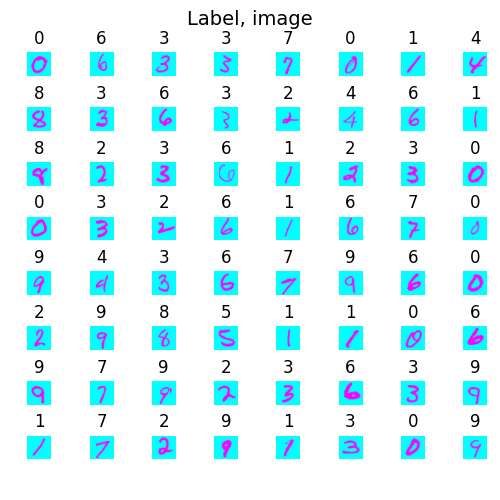

In [30]:
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    
    X_random_reshaped = X[random_index].reshape((28,28))
    
    ax.imshow(X_random_reshaped, cmap='cool')
    
    ax.set_title(y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

1/1 [==============================] - 0s 6ms/step


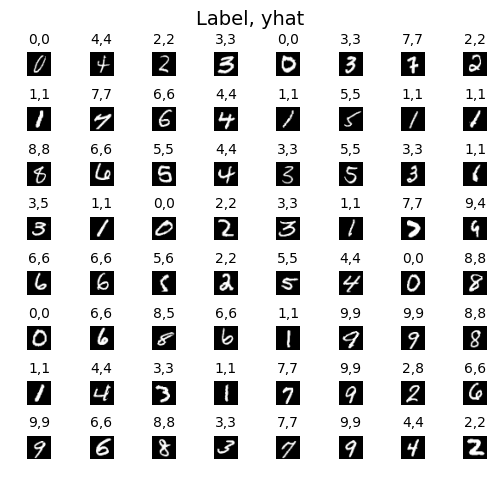

In [31]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((28,28))
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,784))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()